# * Kurapati Venkatesh

# * 09012021

# * Topic: Forecasting – Decision Tree And Random Forest  ✨🎄

# ---------------------------------------------------------------------------

## Problem Statement:

##  Divide the data (Diabetes) into training and test datasets and create a Random Forest and Decision Tree Model to classify 'Class Variable' or “Outcome” 

## -----------------------------------------------------------------------------------

### Problem Objective:
### The main objective of data set is to classify that wether a perticular person has diabetes or not with help of several independaent variables given in data set.

### Dataset Description:

The datasets consists 8 independent variables and one Dependent variable.

### Independent variables includes:

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

### Dependent variable:

Outcome: 1 as diabites detected & 0 as not detetcted

## -------------------------------------------------------------------------------------------

## import libraries:

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## import dataset:

In [24]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv(r"G:\360digit\assignments meterial\Decision tree\Diabetes.csv", header=None, names=col_names)

In [25]:
pima = pima.iloc[1:]

In [26]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,YES
2,1,85,66,29,0,26.6,0.351,31,NO
3,8,183,64,0,0,23.3,0.672,32,YES
4,1,89,66,23,94,28.1,0.167,21,NO
5,0,137,40,35,168,43.1,2.288,33,YES


### Feature Selection:

Here, we need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [27]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

### Splitting Data:

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [28]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Building Decision Tree Model:

Let's create a Decision Tree Model using Scikit-learn.

In [29]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [30]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [31]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluating Model:

Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [32]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


Well, we got a classification rate of 66.23%, considered as good accuracy. We can improve this accuracy by tuning the parameters in the Decision Tree Algorithm.

## Visualizing Decision Trees:

We can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook.

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

In [33]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [34]:
dot_data = StringIO()

In [35]:
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])

In [36]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

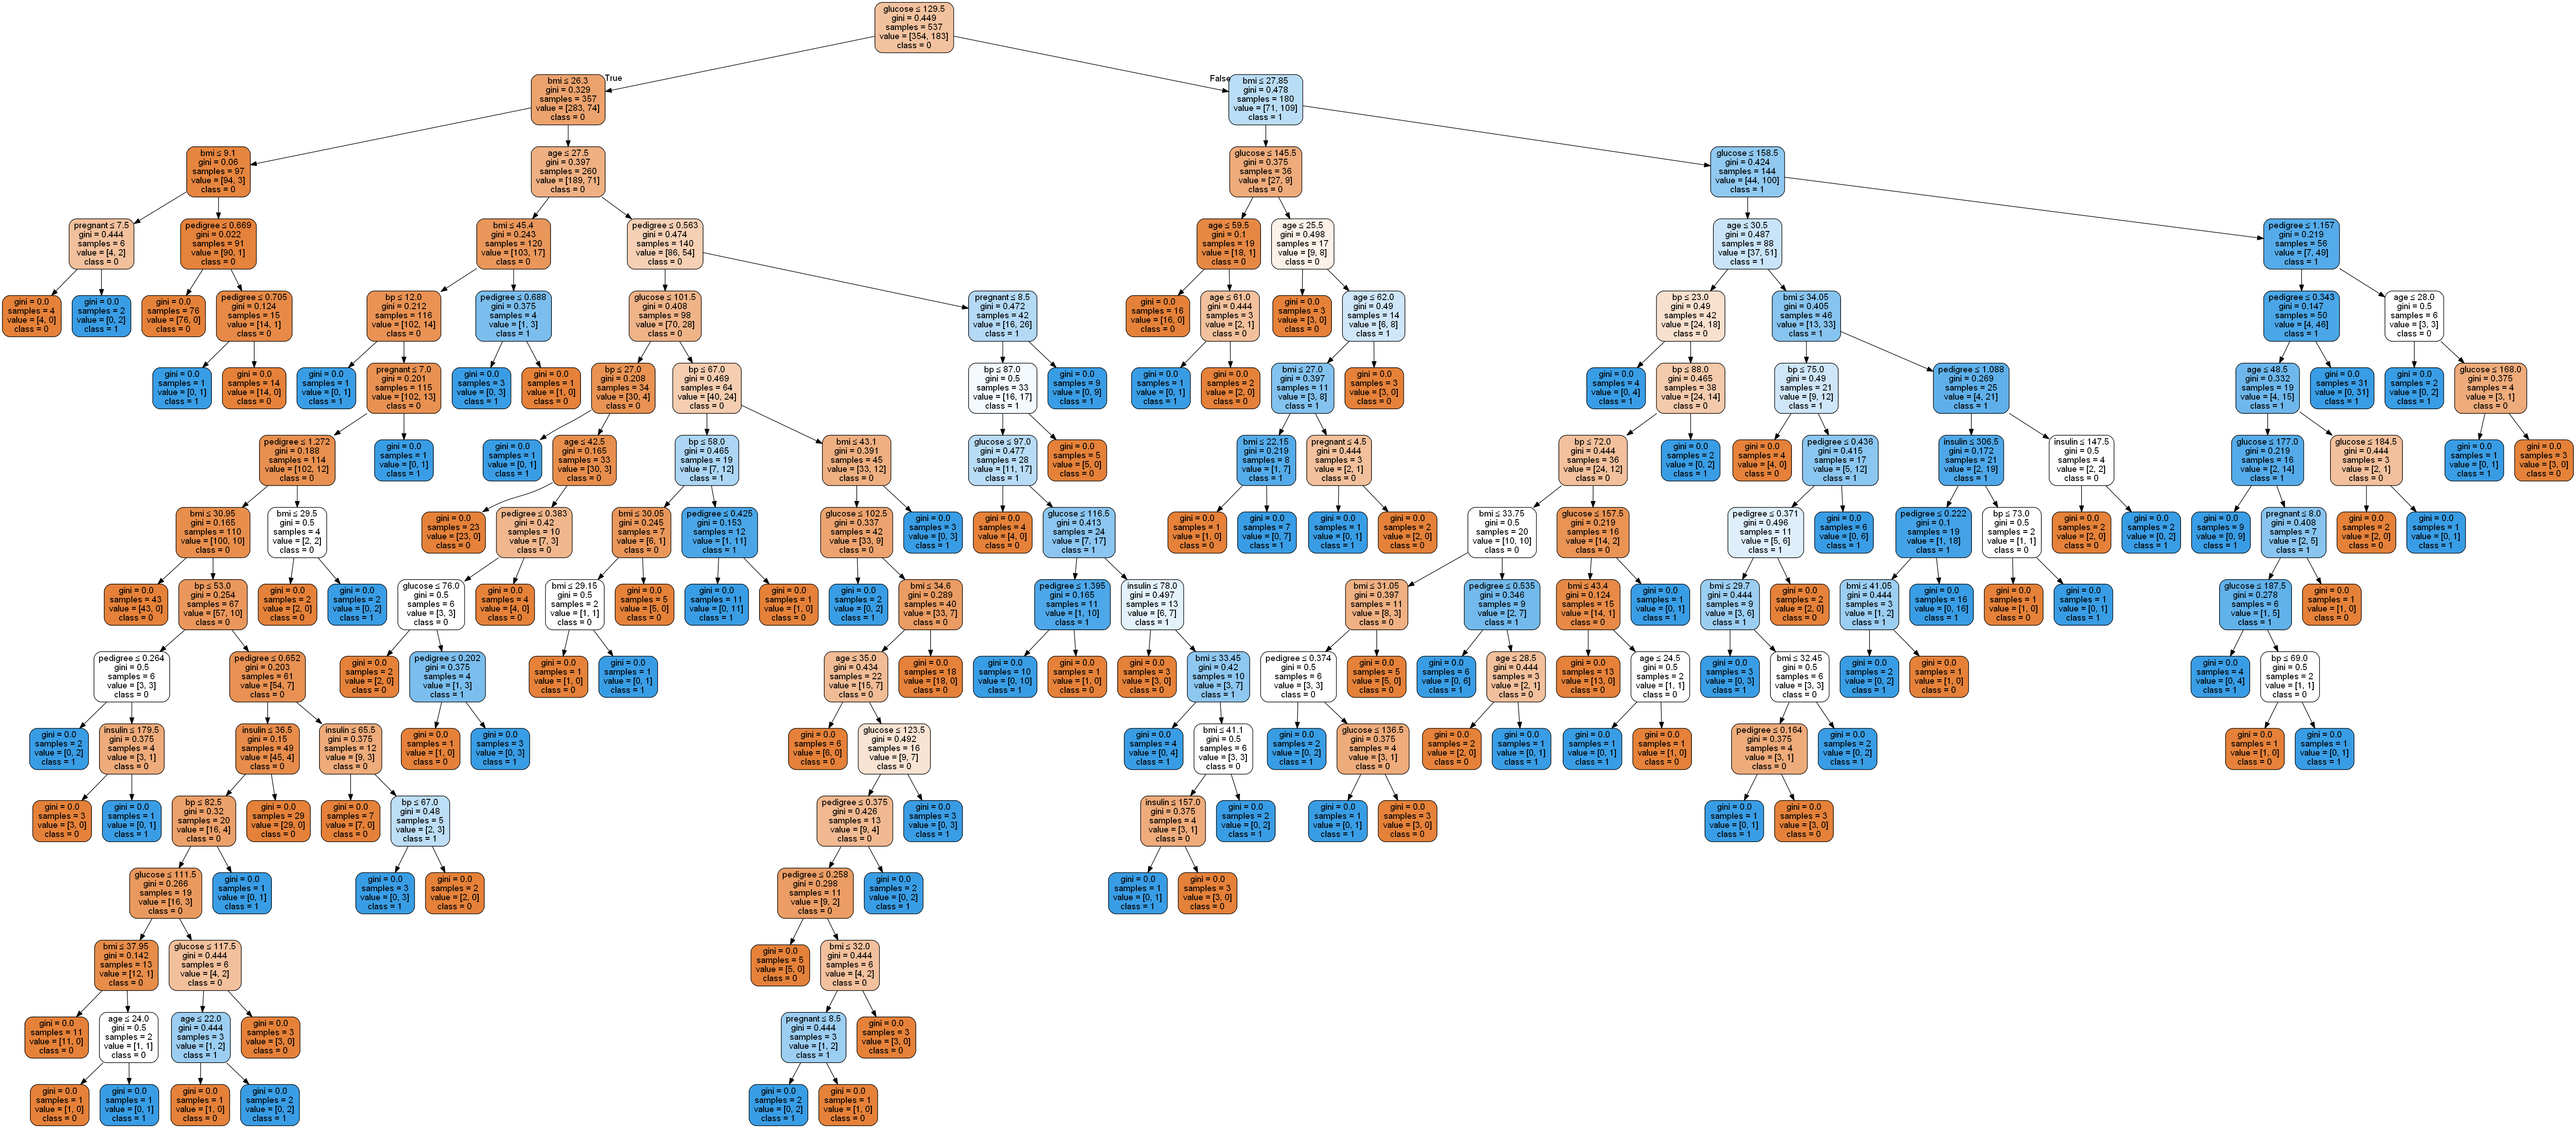

In [37]:
graph.write_png('diabetes.png')
Image(graph.create_png())

In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. We can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

## Optimizing Decision Tree Performance:

- criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.


- splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.



- max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, we can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, we can also try other attribute selection measure such as entropy.

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [17]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [18]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [19]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


Well, the classification rate increased to 77.05%, which is better accuracy than the previous model.

## Visualizing Decision Trees:

In [20]:
dot_data = StringIO()

In [21]:
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

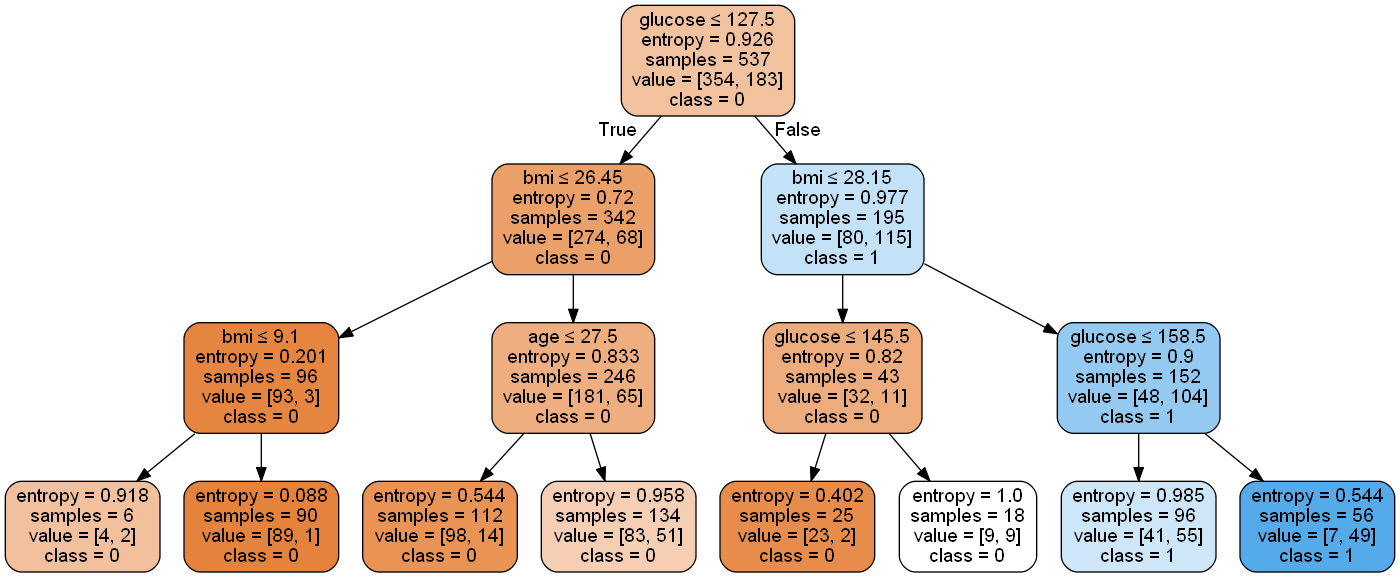

In [22]:
graph.write_png('diabetesprune.png')
Image(graph.create_png())

This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.